
# 抓取微信公众号文章内容




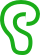
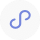

In [11]:
from IPython.display import display_html, HTML
HTML(url = 'http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd')
# the webpage we would like to crawl

## 查看源代码 Inspect

In [12]:
url = "http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd"
content = requests.get(url).text #获取网页的html文本
soup = BeautifulSoup(content, 'html.parser') 

In [17]:
title = soup.select("#activity-name") # #activity-name
title[0].text.strip()

'南大新传 | 微议题：地震中民族自豪—“中国人先撤”'

In [18]:
soup.find('h2', {'class', 'rich_media_title'}).text.strip()

'南大新传 | 微议题：地震中民族自豪—“中国人先撤”'

In [25]:
print(soup.find('div', {'class', 'rich_media_meta_list'}) )


<div class="rich_media_meta_list" id="meta_content">
<span class="rich_media_meta rich_media_meta_text">
                                                南大新传院
                                            </span>
<span class="rich_media_meta rich_media_meta_nickname" id="profileBt">
<a href="javascript:void(0);" id="js_name">
                        微议题排行榜                      </a>
<div class="profile_container" id="js_profile_qrcode" style="display:none;">
<div class="profile_inner">
<strong class="profile_nickname">微议题排行榜</strong>
<img alt="" class="profile_avatar" id="js_profile_qrcode_img" src="">
<p class="profile_meta">
<label class="profile_meta_label">微信号</label>
<span class="profile_meta_value">IssuesRank</span>
</p>
<p class="profile_meta">
<label class="profile_meta_label">功能介绍</label>
<span class="profile_meta_value">感谢关注《微议题排行榜》。我们是南京大学新闻传播学院，计算传播学实验中心，致力于研究社会化媒体时代的公共议程，发布新媒体平台的议题排行榜。</span>
</p>
</img></div>
<span class="profile_arrow_wrp" id="js_profile_arrow_wrp">
<i clas

In [26]:
soup.select('#publish_time')

[<em class="rich_media_meta rich_media_meta_text" id="publish_time"></em>]

In [27]:
article = soup.find('div', {'class' , 'rich_media_content'}).text
print(article)


点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与地震这类文章内容相似，纯粹是对发改委的调侃。称其“预测”地震非常准确，只要一

In [30]:
rmml = soup.find('div', {'class', 'rich_media_meta_list'})
#date = rmml.find(id = 'post-date').text
rmc = soup.find('div', {'class', 'rich_media_content'})
content = rmc.get_text()
print(title[0].text.strip())
#print(date)
print(content) 



南大新传 | 微议题：地震中民族自豪—“中国人先撤”

点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与地震这类文章内容相似，

## wechatsogou 

> pip install wechatsogou --upgrade


https://github.com/Chyroc/WechatSogou

In [3]:
!pip install wechatsogou --upgrade

In [7]:
import wechatsogou

# 可配置参数

# 直连
ws_api = wechatsogou.WechatSogouAPI()

# 验证码输入错误的重试次数，默认为1
ws_api = wechatsogou.WechatSogouAPI(captcha_break_time=3)

# 所有requests库的参数都能在这用
# 如 配置代理，代理列表中至少需包含1个 HTTPS 协议的代理, 并确保代理可用
ws_api = wechatsogou.WechatSogouAPI(proxies={
    "http": "127.0.0.1:8888",
    "https": "127.0.0.1:8888",
})

# 如 设置超时
ws_api = wechatsogou.WechatSogouAPI(timeout=0.1)

In [12]:
ws_api =wechatsogou.WechatSogouAPI()
ws_api.get_gzh_info('侠客栈')

{'open_id': 'oIWsFt8tsw8GsejMnpu1SUBK4BkM',
 'profile_url': 'http://mp.weixin.qq.com/profile?src=3&timestamp=1638855866&ver=1&signature=RcKL6h5J9i7U7j3XEdEsS*550qpahebslJl5pdOvKt-PE7hVecsxp4-T7ub*3cZkeo-1pKVuQzfS-r6TkS1zDg==',
 'headimage': 'https://img01.sogoucdn.com/app/a/100520090/oIWsFt8tsw8GsejMnpu1SUBK4BkM',
 'wechat_name': '侠客栈',
 'wechat_id': 'xiake-zhan',
 'qrcode': '',
 'introduction': '我们心里,都住着一个侠客!',
 'authentication': '\n',
 'post_perm': -1,
 'view_perm': -1}

In [17]:
ws_api =wechatsogou.WechatSogouAPI()
ws_api.get_gzh_article_by_history('乱花迷眼')

{'gzh': {'wechat_name': '乱花迷眼',
  'wechat_id': 'wegonews',
  'introduction': '为您精选精彩好文',
  'authentication': '为您精选精彩好文',
  'headimage': 'http://wx.qlogo.cn/mmhead/Q3auHgzwzM7EODqEq8WmX867sP4hamJGDLyJA8o1lakRkj00muZ4LQ/0'},
 'article': []}

In [19]:
articles = ws_api.search_article('南京航空航天大学')

In [20]:
for i in articles:
    print(i)

{'article': {'title': '南航PK北外,这一轮拉歌高科技又养眼,你选谁?', 'abstract': '\u200d今天,南京航空航天大学PK北京外国语大学 在重点实验室里,在航空航天馆中,在国产大飞机前,南航人齐声唱响《歌唱祖国...', 'time': 1556781419, 'imgs': ['https://img01.sogoucdn.com/net/a/04/link?appid=100520033&url=http://mmbiz.qpic.cn/mmbiz_jpg/oq1PymRl9D4mFNqBHicjHOYp2m7uRHJhN5oqeeKE0Msebpqqj1tg1K0gPEnLZnfROzwPWvMcdebVHB7ibgjg6SGw/0?wx_fmt=jpeg'], 'url': 'http://mp.weixin.qq.com/s?src=11&timestamp=1560004408&ver=1656&signature=1o9CmS1bOg4M7mZDqYRx-jW5Vb2YqDMV2k5rPJTIyThFPbsagSOjJSRCv2JsuA5k8c07o*P0ZN6SDlmWnhkzC*OXrO9AMuEaC1YUZ6rLGkkQ10il2u3vA3VmR4UYw319&new=1'}, 'gzh': {'headimage': 'http://wx.qlogo.cn/mmhead/Q3auHgzwzM7K1jDqNGenoK7DmzRhYy9KqAXmqMNS8c99Yfy1cfHw9Q/0', 'isv': 1, 'profile_url': 'http://mp.weixin.qq.com/profile?src=3&timestamp=1560004408&ver=1&signature=mFCwcLO9hTwe*Js7TGQ457olpvr1d85gJSnVLyFgtYlw2lpbi2onr1QxZrtxIjlO4jWp*U8JuvtQ-NwVRTEYWQ==', 'wechat_name': '央视新闻'}}
{'article': {'title': '别人家的学校!南航龙虾节来了!', 'abstract': '南航龙虾美食节南京航天航空大学明故宫校区食堂:第二食堂地址:秦淮区御道街29号交通:地铁2